In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from data335 import lm, stan_lm, bambi_lm, mad, plot_regression_line

In [152]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()
df

,height,weight,male,ethnicity
0,74,210.0,1,White
1,66,125.0,0,White
2,64,126.0,0,White
3,65,200.0,0,White
4,63,110.0,0,Other
...,...,...,...,...
1811,61,120.0,0,White
1812,64,130.0,0,White
1813,72,194.0,1,White
1814,63,155.0,0,Other


In [153]:
ethnicities = pd.get_dummies(df["ethnicity"])
ethnicities

,Black,Hispanic,Other,White
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1811,False,False,False,True
1812,False,False,False,True
1813,False,False,False,True
1814,False,False,True,False


In [162]:
X = pd.concat([df[["height", "male"]], ethnicities], axis=1)
y = df["weight"]
X
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(-105.81367899329868,
 array([ 3.85213496, 12.1063201 ,  5.90126453, -0.25104753, -6.36009046,
         0.70987346]))

In [157]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other + White", data)
fit

/Users/mgreenbe/DATA335W2025/code/data335.py:113: RuntimeWarning: invalid value encountered in sqrt
  coef_se = se * np.sqrt(unscaled_coef_cov.diagonal())


,estimate,standard error,t-statistic,p-value
Intercept,4422.546875,NaN,NaN,NaN
height,20.263449,19.350139,1.047199,0.29515
male,-102.423275,152.586856,-0.671246,0.502151
Black,-3404.750000,NaN,NaN,NaN
Hispanic,-1145.609375,NaN,NaN,NaN
Other,-2942.593750,NaN,NaN,NaN
White,-3655.765625,NaN,NaN,NaN
sigma,2189.603175,,,


In [158]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,5.191391,2.267693,2.289283,0.022179
Hispanic,-0.960921,2.939356,-0.326915,0.74377
Other,-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [163]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ 0 + height + male + Black + Hispanic + Other + White", data)
fit

,estimate,standard error,t-statistic,p-value
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,-99.912414,16.44868,-6.07419,0.0
Hispanic,-106.064727,16.265595,-6.520802,0.0
Other,-112.173769,16.620302,-6.749201,0.0
White,-105.103806,16.3732,-6.419258,0.0
sigma,28.636333,,,


In [165]:
fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [168]:
data = df.copy()
data["ethnicity"] = df["ethnicity"].astype("category")
fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
ethnicity[T.Other],-12.261355,5.184896,-2.364822,0.018145
ethnicity[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [173]:
data["ethnicity"] = data["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)
data["ethnicity"].cat.categories

Index(['White', 'Black', 'Hispanic', 'Other'], dtype='object')

In [175]:
fit = lm("weight ~ height + male + ethnicity", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


### Residual plots

- Residuals:
  $$
  r_i = y_i - (\hat{\beta}_0x_0 + \hat{\beta}_1 x_1 + \cdots + \hat{\beta}_{n-1}x_{n-1})
  $$

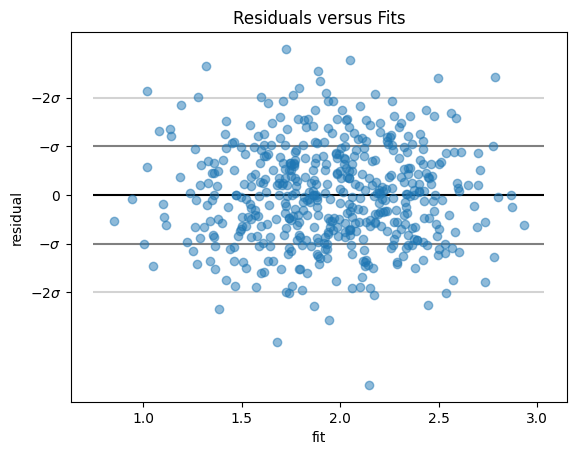

In [178]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

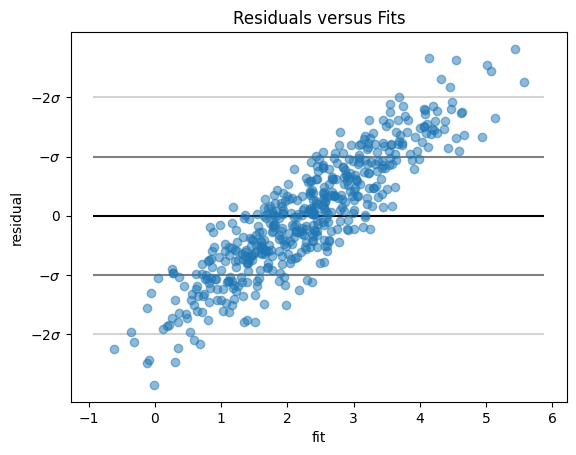

In [ ]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

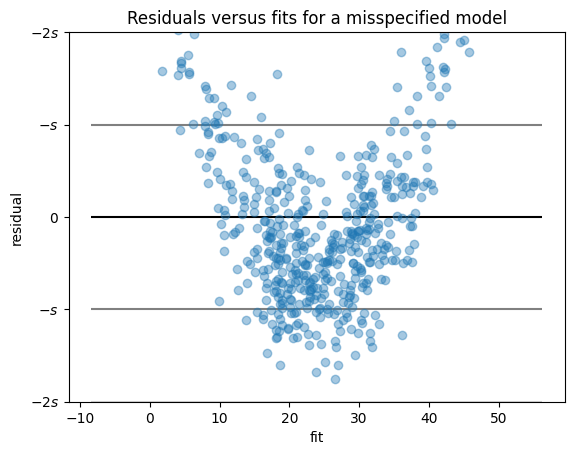

In [ ]:
n = 500
p = 10
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
b = 2 * rng.uniform(size=p)
e = rng.normal(size=n)
y = (X @ b) ** 2 + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r = y - y_pred
s = r.std()

plt.plot(y_pred, r, "o", alpha=0.4)
plt.ylim(-3, 3)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus fits for a misspecified model")
plt.xlabel("fit")
plt.ylabel("residual")

plt.show()

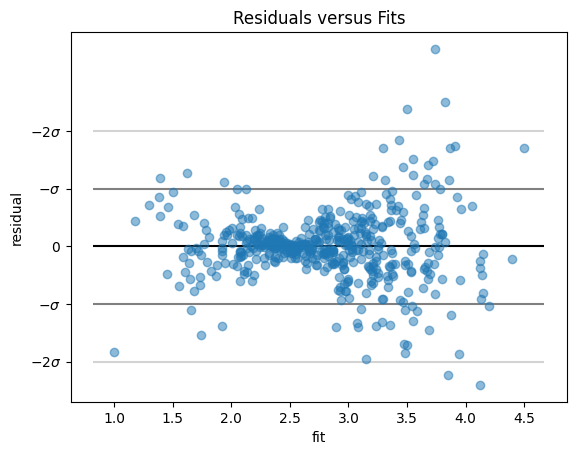

In [199]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
y = X @ b
y = y + (y - 2.5) * rng.normal(size=n)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

In [198]:
y.mean()

2.589869937769013

In [186]:
def make_data():
    n = 500
    np.random.seed(0)
    age = np.random.choice([0, 1, 2, 3], size=n)
    exercise = 2 * age + 3 * np.random.normal(size=n) + 6
    colesterol = 200 + 30 * age - 5 * exercise + 10 * np.random.normal(size=n)
    df = pd.DataFrame({"age": age, "exercise": exercise, "colesterol": colesterol})
    return df


data = make_data()
data.head()

,age,exercise,colesterol
0,0,7.569830,156.823822
1,3,11.485361,243.480692
2,1,10.315372,174.960647
3,0,8.470512,149.701074
4,3,18.489708,199.531134


<Axes: xlabel='exercise', ylabel='colesterol'>

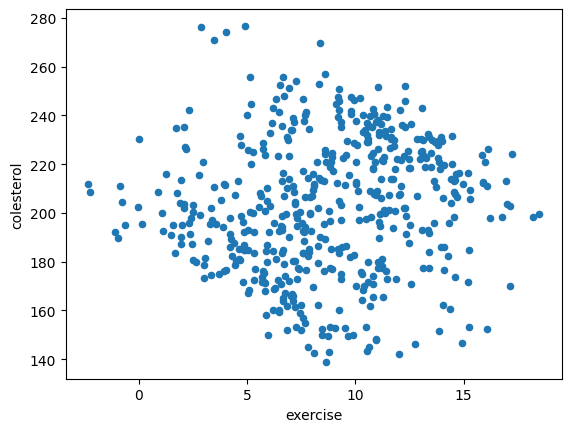

In [187]:
data.plot.scatter("exercise", "colesterol")

In [ ]:
fit = lm("colesterol ~ exercise", data)

,estimate,standard error,t-statistic,p-value
Intercept,197.127831,2.996137,65.793989,0.0
exercise,0.633311,0.313554,2.019784,0.043941
sigma,27.385991,,,


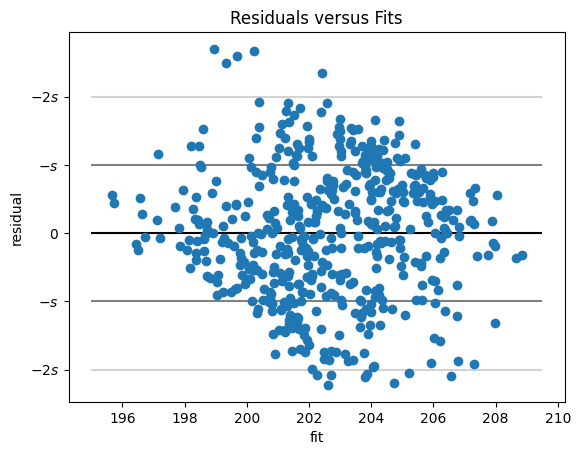

In [ ]:
s = fit.se
plt.scatter(y_pred, r)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

x.min() = 0.00, x.max() = 20.03


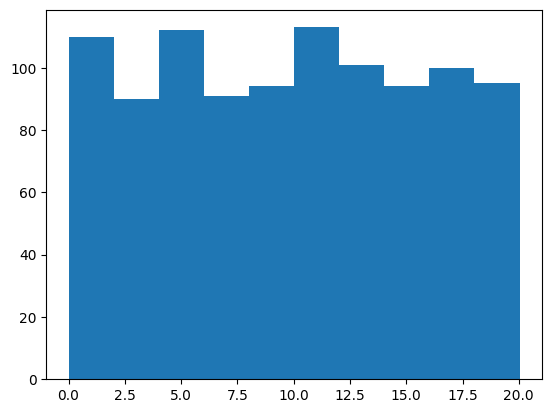

In [ ]:
rng = np.random.default_rng()
n = 1000

x = np.exp(3) * rng.uniform(size=n)
print(f"x.min() = {x.min():.2f}, x.max() = {x.max():.2f}")
plt.hist(x)
plt.show()

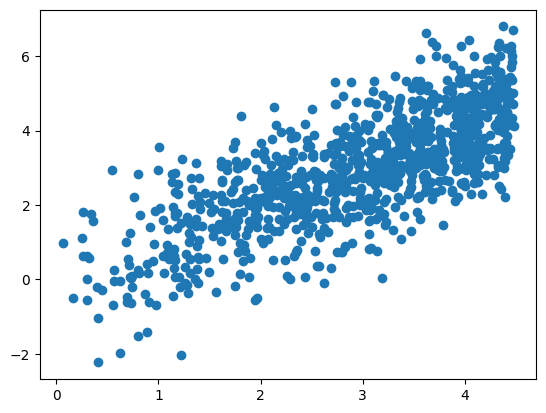

In [233]:
y = np.sqrt(x) + rng.normal(size=n)
plt.plot(np.sqrt(x), y, "o")

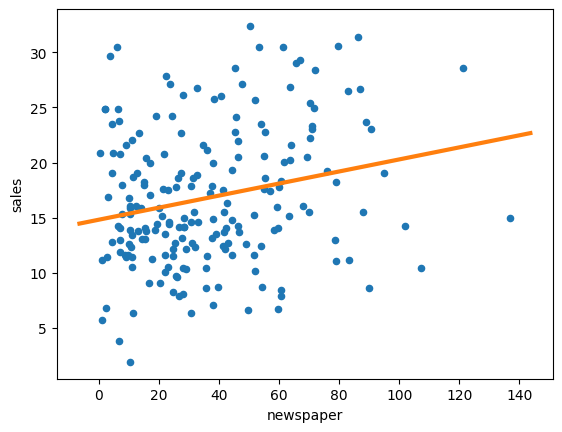

In [275]:
marketing = pd.read_csv("../data/marketing.csv")
marketing.plot.scatter("newspaper", "sales")
fit = lm("sales ~ newspaper", marketing)
plot_regression_line(fit.coef_est, lw=3, color="C1")
sales_pred = fit.predict(marketing)
residuals = marketing["sales"] - sales_pred

#### How does spending on food change as incomes rise?

- Hanna Ritchie, [Share of expenditure spent on food vs. total consumer
expenditure](https://ourworldindata.org/grapher/food-expenditure-share-gdp), Our World in Data, 2023.

In [358]:
data = (
    pd.read_csv(
        "../data/food-expenditure-vs-gdp.csv",
        usecols=[
            "Entity",
            "Year",
            "Total food expenditure",
            "Total consumer expenditure",
        ],
    )
    .rename(
        columns={
            "Total food expenditure": "Food",
            "Total consumer expenditure": "Consumer",
        }
    )
    .dropna()
)

for entity, group in data.groupby("Entity"):
    assert all(group["Year"].unique() == [2018, 2019, 2020, 2021, 2022])

data.pop("Year")
data = data.groupby("Entity").agg("mean").round()
data

,Food,Consumer
Entity,,
Algeria,596.0,1643.0
Angola,641.0,1333.0
Argentina,1531.0,6515.0
Australia,3004.0,31418.0
Austria,2550.0,25850.0
...,...,...
United States,2806.0,44283.0
Uruguay,1930.0,10766.0
Uzbekistan,357.0,949.0


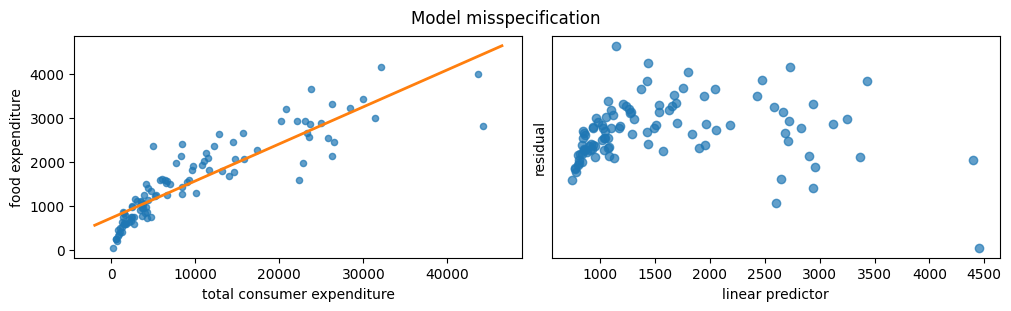

In [366]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

data.plot.scatter("Consumer", "Food", ax=ax0, alpha=0.7)
fit = lm("Food ~ Consumer", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = data["Food"] - food_pred

ax0.set_xlabel("total consumer expenditure")
ax0.set_ylabel("food expenditure")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Model misspecification")
plt.show()

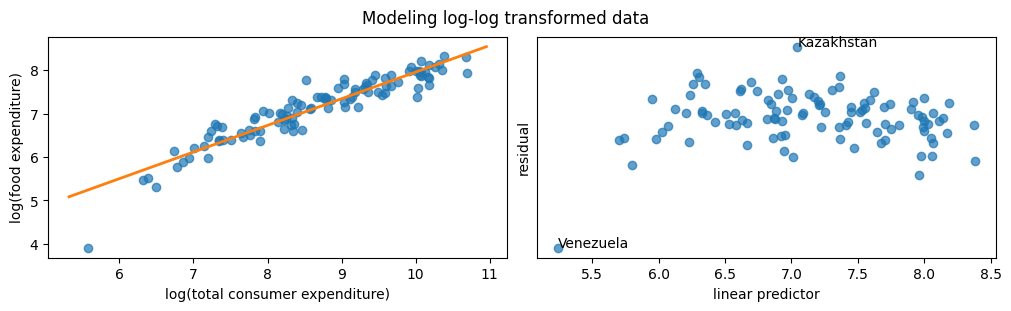

In [368]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

ax0.scatter(np.log(data["Consumer"]), np.log(data["Food"]), alpha=0.7)
fit = lm("log(Food) ~ log(Consumer)", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = np.log(data["Food"]) - food_pred

ax0.set_xlabel("log(total consumer expenditure)")
ax0.set_ylabel("log(food expenditure)")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Modeling log-log transformed data")

i = residuals.argmin()
j = residuals.argmax()

ax1.annotate(text=data.index[i], xy=(food_pred[i], residuals.iloc[i]))
ax1.annotate(text=data.index[j], xy=(food_pred[j], residuals.iloc[j]))
plt.show()

- [Kazakhstanis Are Spending More Than a Half of Their Income on Food](https://kz.kursiv.media/en/2021-02-25/kazakhstanis-are-spending-more-half-their-income-food/)

- [Shortages in Venezuela](https://en.wikipedia.org/wiki/Shortages_in_Venezuela#cite_note-economist.com-7)

- [Engel's Law: Richer people spend more money on food, but it makes up a smaller share of their income](https://ourworldindata.org/engels-law-food-spending)

In [ ]:
df = (
    pd.read_csv("../data/ncbirths.csv")
    .drop(columns=["fage"])
    .dropna()
    .reset_index(drop=True)
)

assert np.allclose(df["weeks"], df["weeks"].round())
df["weeks"] = df["weeks"].astype(int)
assert np.allclose(df["visits"], df["visits"].round())
df["visits"] = df["visits"].astype(int)
assert np.allclose(df["gained"], df["gained"].round())
df["gained"] = df["gained"].astype(int)

for c in df.columns:
    if df[c].dtype == "object":
        assert len(df[c].unique()) == 2

df["mature"] = df["mature"] == "mature mom"
df["premie"] = df["premie"] == "premie"
df["married"] = df["marital"] == "married"
df["male"] = df["gender"] == "male"
df["smoker"] = df["habit"] == "smoker"
df["lowbirthweight"] = df["lowbirthweight"] == "low"
df["whitemom"] = df["whitemom"] == "white"

assert df[df["mature"]]["mage"].min() > df[~df["mature"]]["mage"].max()
assert df[df["premie"]]["weeks"].max() < df[~df["premie"]]["weeks"].max()
assert (
    df[df["lowbirthweight"]]["weight"].max() < df[~df["lowbirthweight"]]["weight"].max()
)

df = df.drop(
    columns=["marital", "gender", "habit", "mature", "premie", "lowbirthweight"]
)

df["whitemom"] = df["whitemom"].astype(int)
df["married"] = df["married"].astype(int)
df["male"] = df["male"].astype(int)
df["smoker"] = df["smoker"].astype(int)

df.to_csv("../data/ncbirths_preprocessed.csv", index=False)

df

,mage,weeks,visits,gained,weight,whitemom,married,male,smoker
0,13,39,10,38,7.63,0,0,1,0
1,14,42,15,20,7.88,0,0,1,0
2,15,37,11,38,6.63,1,0,0,0
3,15,41,6,34,8.00,1,0,1,0
4,15,39,9,27,6.38,0,0,0,0
...,...,...,...,...,...,...,...,...,...
957,42,40,10,26,8.44,0,1,1,0
958,42,38,18,20,6.19,1,1,0,0
959,45,40,15,32,6.94,1,1,0,0
960,46,31,8,25,4.56,0,1,0,0


In [ ]:
from data335 import compare_fits


mfull = lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)
mred = lm("weight ~ mage + weeks + visits + gained + whitemom + married + male", df)

compare_fits(mfull, mred)

FitComparison(r2=0.013195350266252848, r2_adj=0.012159878440718974, ftest=FTestResult(df1=1, df2=953, stat=12.743321393076082, pval=0.0003751158942971733))

In [524]:
mfull

,estimate,standard error,t-statistic,p-value
Intercept,-6.371455,0.508634,-12.526589,0.0
mage,0.007149,0.006299,1.134982,0.256668
weeks,0.329306,0.012517,26.309284,0.0
visits,-0.004843,0.009249,-0.523618,0.600666
gained,0.009252,0.002465,3.7531,0.000185
whitemom,0.206161,0.082111,2.510761,0.012212
married,0.240029,0.084453,2.842169,0.004576
male,0.384233,0.069431,5.534059,0.0
smoker,-0.377704,0.105806,-3.569779,0.000375
sigma,1.073122,,,


In [ ]:
fit = bambi_lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, mage, weeks, visits, gained, whitemom, married, male, smoker]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [534]:
fit

,median,mad_sd
sigma,1.074101,0.024297
Intercept,-6.379897,0.514236
mage,0.007111,0.006339
weeks,0.329412,0.012901
visits,-0.004924,0.009253
gained,0.009250,0.002398
whitemom,0.208217,0.081133
married,0.242288,0.086796
male,0.384509,0.070159
smoker,-0.376864,0.106790


In [541]:
np.mean(fit.draws["smoker"] < -0.3)

0.7665

Causal? No. Smoking moms drink more coffee on average, and maybe it's the extra caffeine affecting the baby's weight.

In [ ]:
n = 100
rng = np.random.default_rng()
cov = np.eye(n)
I = np.arange(n - 1)

In [542]:
df = pd.read_csv("../data/earnings.csv")
df

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,61,120.0,0,15000.0,15.0,White,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,64,130.0,0,8000.0,8.0,White,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,72,194.0,1,60000.0,60.0,White,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,63,155.0,0,15000.0,15.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69
